# Partie 3 : Réglages pour le levier "Décarbonation du carburant"
<a id="10"></a>


# Calculs préliminaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# https://www.iea.org/sankey/#?c=World&s=Final%20consumption
E_primaire_aviation_2019 = (8641+5817)/1000 # EJ
part_budget_C_aviation = 2.6/100
budget_C = 400 # GtCO2
taux_croissance_trafic = 3/100

# Première partie : mix électrique et facteur d'émission

Allez récupérer sur our world in data les données d'évolution de la production électrique et nettoyez les données : sélectionnez le monde, après 1984, enlevez les deux premières colonnes et renommez les colonnes. Vous ajouterez aussi une colonne avec la somme.

source : https://ourworldindata.org/grapher/electricity-prod-source-stacked

In [2]:
evol_prod_elec = pd.read_csv("BE-decarbo/electricity-prod-source-stacked.csv")
evol_prod_elec = evol_prod_elec[(evol_prod_elec.Entity=="World") & (evol_prod_elec.Year>1984)]
del evol_prod_elec['Entity']
del evol_prod_elec['Code']
source_elec = ['charbon','gaz','hydro','autre','pv','petrole','eolien','nucleaire']
source_elec_bc = ['hydro','autre','pv','eolien','nucleaire']
evol_prod_elec.columns = ['annee'] + source_elec
evol_prod_elec.head()

,annee,charbon,gaz,hydro,autre,pv,petrole,eolien,nucleaire
7316,1985,3747.634,1422.361,1979.775,77.792,0.012,1108.761,0.064,1488.922
7317,1986,3838.270,1428.758,2006.572,85.579,0.015,1166.249,0.139,1594.736
7318,1987,4057.283,1512.935,2033.706,91.643,0.011,1181.022,0.195,1734.733
7319,1988,4199.198,1536.549,2098.721,94.281,0.010,1254.288,0.332,1891.249
7320,1989,4377.118,1724.386,2087.571,104.348,0.262,1346.722,2.650,1945.011


In [3]:
evol_prod_elec['total'] = evol_prod_elec.iloc[:,1:].sum(axis=1)
evol_prod_elec['total bc'] = evol_prod_elec[source_elec_bc].sum(axis=1)
for s in source_elec:
    name = 'prop '+s
    evol_prod_elec[name] = evol_prod_elec[s]/evol_prod_elec['total']
evol_prod_elec.head()

,annee,charbon,gaz,hydro,autre,pv,petrole,eolien,nucleaire,total,total bc,prop charbon,prop gaz,prop hydro,prop autre,prop pv,prop petrole,prop eolien,prop nucleaire
7316,1985,3747.634,1422.361,1979.775,77.792,0.012,1108.761,0.064,1488.922,9825.321,3546.565,0.381426,0.144765,0.201497,0.007918,1.221334e-06,0.112847,0.000007,0.151539
7317,1986,3838.270,1428.758,2006.572,85.579,0.015,1166.249,0.139,1594.736,10120.318,3687.041,0.379264,0.141177,0.198272,0.008456,1.482167e-06,0.115238,0.000014,0.157578
7318,1987,4057.283,1512.935,2033.706,91.643,0.011,1181.022,0.195,1734.733,10611.528,3860.288,0.382347,0.142575,0.191651,0.008636,1.036608e-06,0.111296,0.000018,0.163476
7319,1988,4199.198,1536.549,2098.721,94.281,0.010,1254.288,0.332,1891.249,11074.628,4084.593,0.379173,0.138745,0.189507,0.008513,9.029649e-07,0.113258,0.000030,0.170773
7320,1989,4377.118,1724.386,2087.571,104.348,0.262,1346.722,2.650,1945.011,11588.068,4139.842,0.377726,0.148807,0.180148,0.009005,2.260946e-05,0.116216,0.000229,0.167846


Allez récupérer sur our world in data les données d'évolution du mix électrique et tracez son évolution.

source : https://ourworldindata.org/grapher/share-elec-by-source

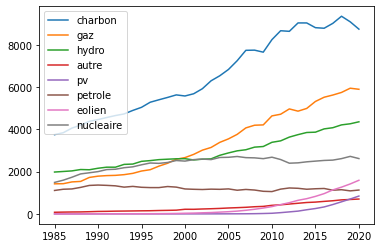

In [4]:
for s in source_elec:
    plt.plot(evol_prod_elec['annee'], evol_prod_elec[s],label=s)
plt.legend()
plt.show()

Allez récupérer dans le 5ème rapport d'évaluation du GIEC les données concernant les facteurs d'émission des différentes sources d'électricité.

source : https://www.ipcc.ch/site/assets/uploads/2018/02/ipcc_wg3_ar5_annex-iii.pdf

In [5]:
# valeurs des facteurs d'émission en ??
source_elec = ['charbon','gaz','hydro','autre','pv','petrole','eolien','nucleaire']
facteurs_emission = pd.DataFrame({'source':source_elec,'valeur':[1,2,3,4,5,6,7,8]})

En supposant que les facteurs d'émission sont restés constants, tracez l'évolution des émissions de CO2 et du facteur d'émission au cours du temps.

In [6]:
# pour tracer l'évolution du facteur d'émission il faudrait faire un produit matriciel
x = evol_prod_elec[source_elec].to_numpy()
y = facteurs_emission.iloc[:,1].to_numpy()
evol_prod_elec['CO2'] = pd.DataFrame(data=x.dot(y), columns=["CO2"])
evol_prod_elec.head()
# fe_elec_2020 = 1 # gCO2/MJ

,annee,charbon,gaz,hydro,autre,pv,petrole,eolien,nucleaire,total,total bc,prop charbon,prop gaz,prop hydro,prop autre,prop pv,prop petrole,prop eolien,prop nucleaire,CO2
7316,1985,3747.634,1422.361,1979.775,77.792,0.012,1108.761,0.064,1488.922,9825.321,3546.565,0.381426,0.144765,0.201497,0.007918,1.221334e-06,0.112847,0.000007,0.151539,NaN
7317,1986,3838.270,1428.758,2006.572,85.579,0.015,1166.249,0.139,1594.736,10120.318,3687.041,0.379264,0.141177,0.198272,0.008456,1.482167e-06,0.115238,0.000014,0.157578,NaN
7318,1987,4057.283,1512.935,2033.706,91.643,0.011,1181.022,0.195,1734.733,10611.528,3860.288,0.382347,0.142575,0.191651,0.008636,1.036608e-06,0.111296,0.000018,0.163476,NaN
7319,1988,4199.198,1536.549,2098.721,94.281,0.010,1254.288,0.332,1891.249,11074.628,4084.593,0.379173,0.138745,0.189507,0.008513,9.029649e-07,0.113258,0.000030,0.170773,NaN
7320,1989,4377.118,1724.386,2087.571,104.348,0.262,1346.722,2.650,1945.011,11588.068,4139.842,0.377726,0.148807,0.180148,0.009005,2.260946e-05,0.116216,0.000229,0.167846,NaN


Dans le reste, on parle de mix "bas carbone" pour désigner l'électricité produite à partir d'énergies renouvelables (PV, éolien, hydro) ou de nucléaire.

Reprenez toutes les questions ci-dessus mais uniquement pour l'électricité bas carbone.

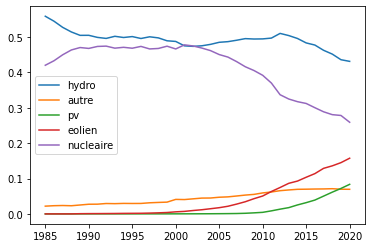

In [7]:
evol_prod_elec_bc = pd.read_csv("BE-decarbo/electricity-prod-source-stacked.csv")
evol_prod_elec_bc = evol_prod_elec_bc[(evol_prod_elec_bc.Entity=="World") & (evol_prod_elec_bc.Year>1984)]
del evol_prod_elec_bc['Entity']
del evol_prod_elec_bc['Code']
evol_prod_elec_bc.columns = ['annee'] + source_elec
del evol_prod_elec_bc['charbon']
del evol_prod_elec_bc['gaz']
del evol_prod_elec_bc['petrole']
evol_prod_elec_bc.head()

evol_prod_elec_bc['total'] = evol_prod_elec_bc.iloc[:,1:].sum(axis=1)
source_elec_bc = ['hydro','autre','pv','eolien','nucleaire']
for s in source_elec_bc:
    name = 'prop '+s
    evol_prod_elec_bc[name] = evol_prod_elec_bc[s]/evol_prod_elec_bc['total']
    plt.plot(evol_prod_elec_bc['annee'], evol_prod_elec_bc[name], label=s)
evol_prod_elec_bc.head()
plt.legend()
plt.show()


# Deuxième partie : avion tout électrique

Gnadt et al étudient un avion tout électrique de 180 places. Nous prendrons leurs valeurs :
- perte entre la production d'électricité et l'énergie embarquée : ~25%
- besoin en énergie embarquée par rapport à un avion conventionnel : +60%

Imaginons que tous les avions deviennent des avions tout électrique et que les besoins en énergie augmentent dans les proportions ci-dessus.

1. Combien d'électricité faudrait-il **produire** ? Comparez cette valeur à la quantité d'électricité totale, et la quantité d'électricité bas carbone.

2. Avec le mix électrique mondial actuel, quelle serait l'évolution des émissions de CO2 ? et avec un mix électrique bas carbone ? Commentez les résultats obtenus.

3. Quelle devrait être la valeur du mix électrique mondial pour que cette solution devienne intéressante ? Suivant les prévisions de XXX, à quelle date devrait-on atteindre une telle valeur ?

source : gnadt et al

# Troisième partie : avion à hydrogène

Comme pour l'avion tout électrique, on imagine que tous les avions sont instantanément remplacés par des avions à hydrogène et on cherche à comprendre l'impact sur l'énergie et les émissions. De nombreuses données sont disponibles dans le rapport "Global Hydrogen Review 2021" de l'AIE sur l'hydrogène.

https://iea.blob.core.windows.net/assets/5bd46d7b-906a-4429-abda-e9c507a62341/GlobalHydrogenReview2021.pdf

### 3.1 Analyse préliminaire

Le tableau suivant présente plusieurs.
1. Choisissez et justifiez **une seule** valeur d'évolution du besoin en énergie embarquée, que vous utiliserez par la suite.

In [ ]:
evol_efficacite_H2 = pd.read_csv("BE-decarbo/evol_efficacite_H2.csv")
evol_efficacite_H2.head()

In [ ]:
scenario_H2_besoin_energie_embarquee = E_primaire_aviation_2019

Trouvez la valeur du PCI de l'hydrogène ainsi que l'énergie nécessaire pour sa liquéfaction (pour la liquéfaction, cf partie "" du rapport de l'AIE). Déduisez-en la quantité d'énergie supplémentaire à utiliser pour alimenter la flotte mondiale en hydrogène liquide.

In [ ]:
PCI_H2 = 119.96 # MJH2/kgH2
energie_liquefaction = PCI_H2/3 # MJ/kgH2
energie_liquefaction_2 = energie_liquefaction / PCI_H2 * scenario_H2_besoin_energie_embarquee

### 3.2 Méthodes de production actuelles


Dans la partie "Hydrogen supply", faites une estimation du facteur d'émission de l'hydrogène.

In [ ]:
prod_H2_total = 90 # MtH2
prod_H2_emissions_CO2 = 900 # MtCO2
prod_H2_fe = prod_H2_emissions_CO2/prod_H2_total #kgCO2/kgH2
print(prod_H2_fe)

Retrouvez cette valeur à partir des valeurs indiquées pour le facteur d'émission à partir du gaz naturel et du charbon.

In [ ]:
prod_H2_prop_gaz = 0.59
prod_H2_fe_gaz = 11.7 # kgCO2/kgH2
prod_H2_prop_charbon = 0.19
prod_H2_fe_charbon = 20 # kgCO2/kgH2
print(prod_H2_prop_gaz*prod_H2_fe_gaz + prod_H2_prop_charbon*prod_H2_fe_charbon)
# print(prod_H2_total*prod_H2_prop_gaz*prod_H2_fe_gaz + prod_H2_total*prod_H2_prop_charbon*prod_H2_fe_charbon)

En supposant que tous les avions actuels sont remplacés par des avions à hydrogène produit avec les méthodes actuelles de production et en utilisant le mix électrique actuel, calculez et commentez les émissions de CO2 correspondantes.

In [ ]:
scenario_H2_prod_actuelle_CO2 = 1

### 3.3 Production par électrolyse

On suppose maintenant que l'hydrogène est produit par électrolyse de l'eau, et on étudiera deux cas :
1. le mix électrique actuel
2. un mix électrique bas carbone

On commence par étudier l'électrolyse.
1. Trouver des valeurs de rendement de l'électrolyse.

In [ ]:
rendement_electrolyse_min = 1
rendement_electrolyse_max = 1

Calculez la quantité d'électricité produite nécessaire, et comparez-la à la quantité d'électricité produite actuellement, et à la quantité d'électricité produite de manière bas carbone.

In [ ]:
besoin_energie_primaire = 1